# Decision Trees

## Introduction
Decision trees are a type of supervised learning algorithm used for both classification and regression tasks. They work by splitting the data into subsets based on the value of input features, creating a tree-like model of decisions. Each internal node represents a "test" on an attribute, each branch represents the outcome of the test, and each leaf node represents a class label (in classification) or a continuous value (in regression).

## Differences from Logistic Regression and Linear Regression
- **Logistic Regression**: This is a linear model used for binary classification tasks. It predicts the probability that a given input belongs to a certain class. Logistic regression assumes a linear relationship between the input features and the log-odds of the outcome.
- **Linear Regression**: This is a linear model used for predicting a continuous target variable. It assumes a linear relationship between the input features and the target variable.
- **Decision Trees**: Unlike logistic and linear regression, decision trees do not assume a linear relationship between the input features and the target variable. They can capture non-linear relationships and interactions between features. Decision trees are also more interpretable as they provide a clear decision-making process.

## Brief History
The concept of decision trees has been around for a long time. The first algorithm for decision tree induction was introduced by J. Ross Quinlan in 1986, known as ID3 (Iterative Dichotomiser 3). This was followed by the development of more advanced algorithms like C4.5 and CART (Classification and Regression Trees). Decision trees have since become a fundamental tool in machine learning and data mining.


Árbol de decisión con profundidad máxima = 1


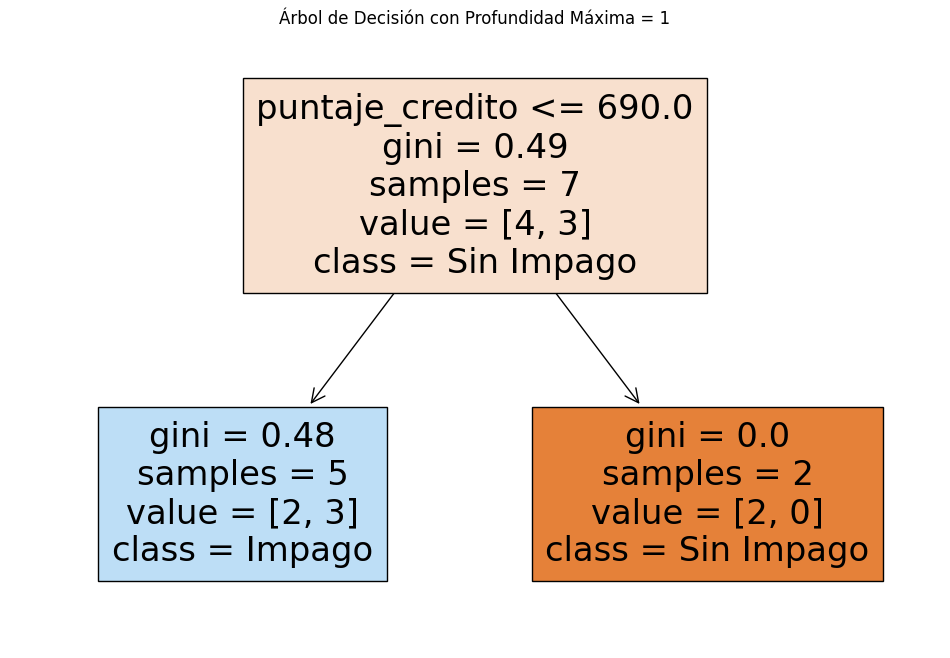


Árbol de decisión con profundidad máxima = 2


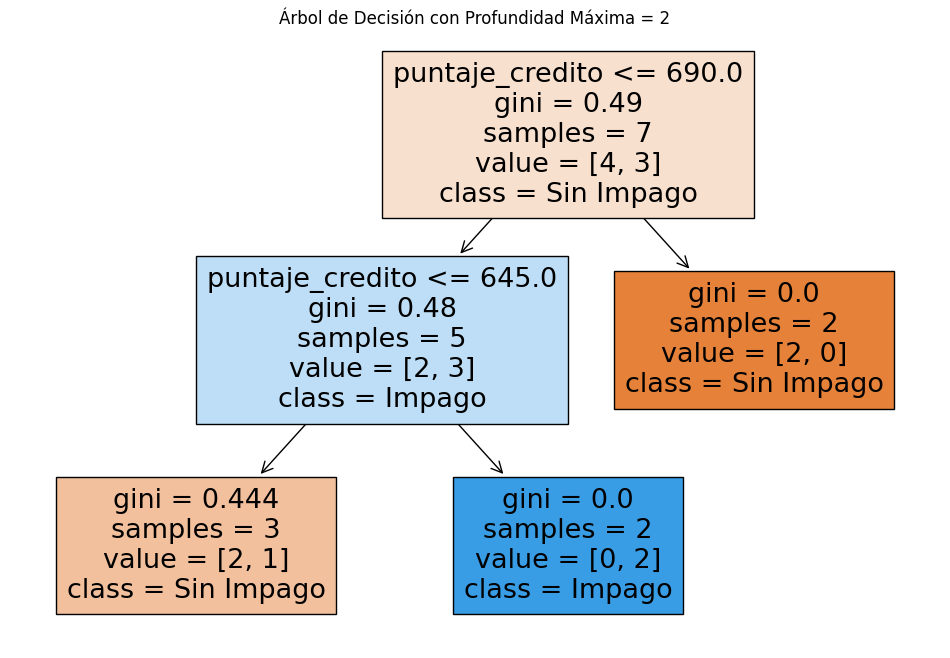


Árbol de decisión con profundidad máxima = 3


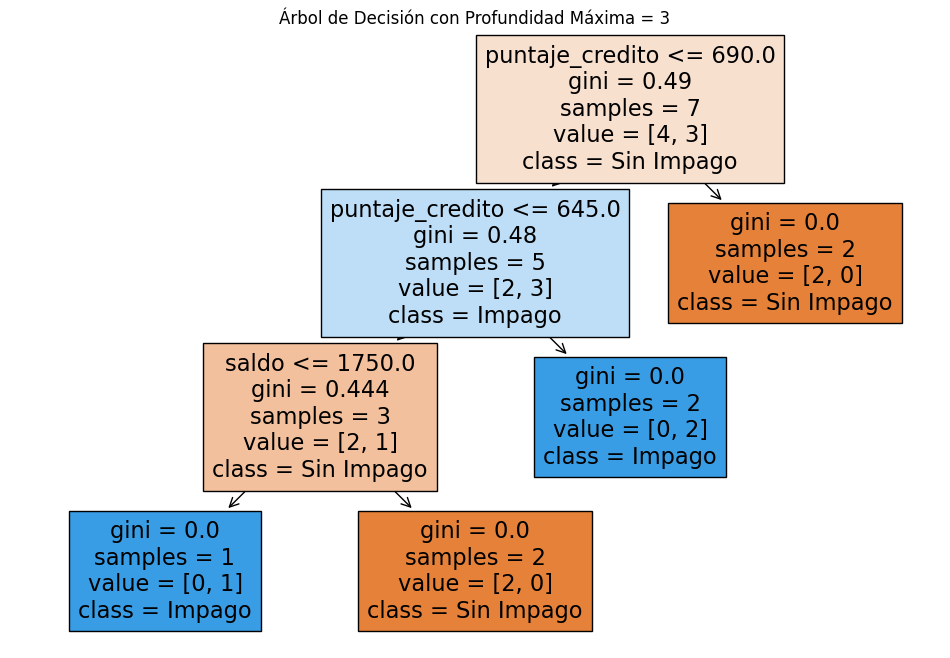


Árbol de decisión con profundidad máxima = 4


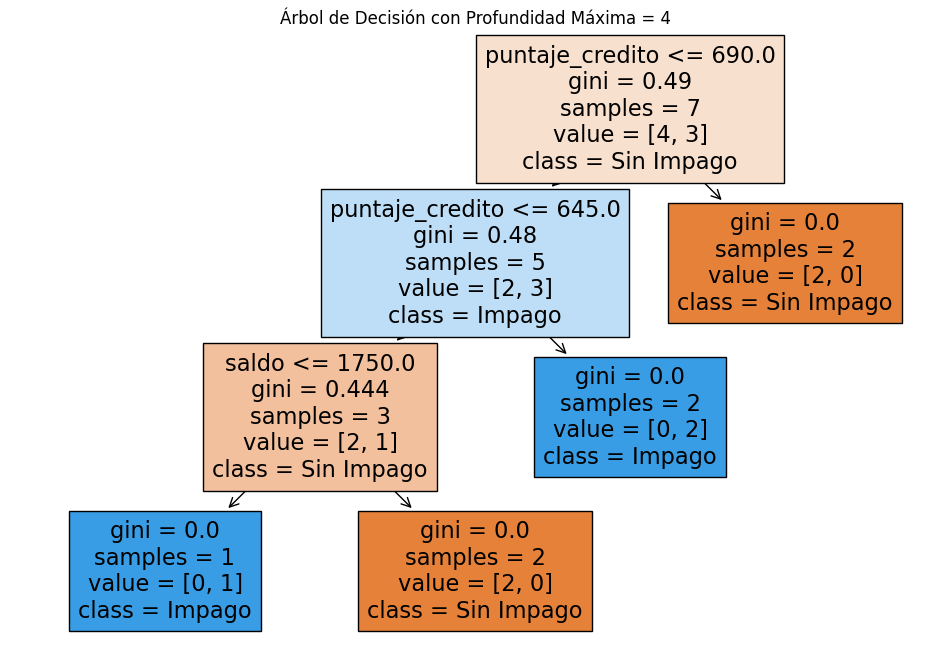

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Simulate a simplified credit card default dataset
data = {
    "edad": [25, 45, 33, 35, 40, 50, 55, 28, 30, 60],
    "ingresos": [50000, 64000, 72000, 58000, 91000, 45000, 80000, 32000, 75000, 100000],
    "puntaje_credito": [600, 650, 550, 700, 750, 580, 620, 670, 720, 680],
    "saldo": [2000, 2500, 1500, 1800, 2300, 3000, 2700, 2200, 1600, 2100],
    "impago": [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]  # 0 = no default, 1 = default
}
df = pd.DataFrame(data)

# Split the data into features and target
X = df[['edad', 'ingresos', 'puntaje_credito', 'saldo']]
y = df['impago']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and plot a decision tree with a specific depth
def plot_decision_tree_with_depth(max_depth):
    # Train the decision tree
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)

    # Plot the tree
    plt.figure(figsize=(12, 8))
    plot_tree(clf, feature_names=X.columns, class_names=["Sin Impago", "Impago"], filled=True)
    plt.title(f"Árbol de Decisión con Profundidad Máxima = {max_depth}")
    plt.show()

# Visualize trees for different depths
for depth in [1, 2, 3, 4]:
    print(f"\nÁrbol de decisión con profundidad máxima = {depth}")
    plot_decision_tree_with_depth(depth)


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import make_moons
import ipywidgets as widgets
from IPython.display import display, clear_output

In [27]:
# Generar datos complejos no linealmente separables con una forma de luna creciente
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
df = pd.DataFrame(X, columns=["edad", "puntaje_credito"])
df['impago'] = y

In [28]:
# Agregar columnas adicionales con datos generados aleatoriamente
np.random.seed(42)
df['ingresos'] = np.random.normal(70000, 15000, 500).astype(int)
df['saldo'] = np.random.normal(2500, 500, 500).astype(int)

In [29]:
# Visualizar algunas filas del dataframe
print("Datos generados:")
print(df.head())

Datos generados:
       edad  puntaje_credito  impago  ingresos  saldo
0  0.831039        -0.258749       1     77450   2963
1  1.185064         0.920387       0     67926   3454
2  1.164022        -0.455526       1     79715   1800
3 -0.023656         1.086288       0     92845   2781
4  0.480503         1.509424       0     66487   2174


In [30]:
# Dividir los datos en características y objetivo
X = df[['edad', 'ingresos', 'puntaje_credito', 'saldo']]
y = df['impago']

In [31]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:

# Función para visualizar el árbol de decisión con una profundidad específica
def plot_decision_tree_with_depth(max_depth):
    # Limpiar la salida anterior
    clear_output(wait=True)
    
    # Entrenar el clasificador con la profundidad especificada
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train, y_train)
    
    # Graficar el árbol de decisión
    plt.figure(figsize=(20, 10))
    plot_tree(clf, feature_names=X.columns, class_names=["Sin Impago", "Impago"], filled=True, fontsize=8)
    plt.title(f"Árbol de Decisión con Profundidad Máxima = {max_depth}")
    plt.show()

# Crear un control deslizante para ajustar la profundidad
depth_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Profundidad')

# Conectar el control deslizante con la función de visualización
interactive_output = widgets.interactive_output(plot_decision_tree_with_depth, {'max_depth': depth_slider})

# Mostrar el control deslizante y la visualización interactiva
display(depth_slider, interactive_output)

IntSlider(value=1, description='Profundidad', max=10, min=1)

Output()

In [32]:
# Función para visualizar fronteras de decisión en solo dos dimensiones (edad y puntaje_credito)
def plot_decision_boundaries(max_depth):
    # Entrenar el clasificador con la profundidad especificada
    clf = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    clf.fit(X_train[['edad', 'puntaje_credito']], y_train)  # Usamos solo dos características para la gráfica
    
    # Crear una malla para la gráfica
    x_min, x_max = X_train['edad'].min() - 0.5, X_train['edad'].max() + 0.5
    y_min, y_max = X_train['puntaje_credito'].min() - 0.5, X_train['puntaje_credito'].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar las fronteras de decisión
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X_train['edad'], X_train['puntaje_credito'], c=y_train, edgecolor='k', cmap=plt.cm.RdYlBu, label='Entrenamiento')
    plt.scatter(X_test['edad'], X_test['puntaje_credito'], c=y_test, marker='x', cmap=plt.cm.RdYlBu, label='Prueba')
    plt.xlabel('Edad')
    plt.ylabel('Puntaje de Crédito')
    plt.title(f"Fronteras de Decisión con Profundidad Máxima = {max_depth}")
    plt.legend()
    plt.show()

In [ ]:
# Crear una interfaz interactiva para ajustar la profundidad y ver las fronteras de decisión
depth_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Profundidad')
interactive_output = widgets.interactive_output(plot_decision_boundaries, {'max_depth': depth_slider})
display(depth_slider, interactive_output)

IntSlider(value=1, description='Profundidad', max=10, min=1)

Output()

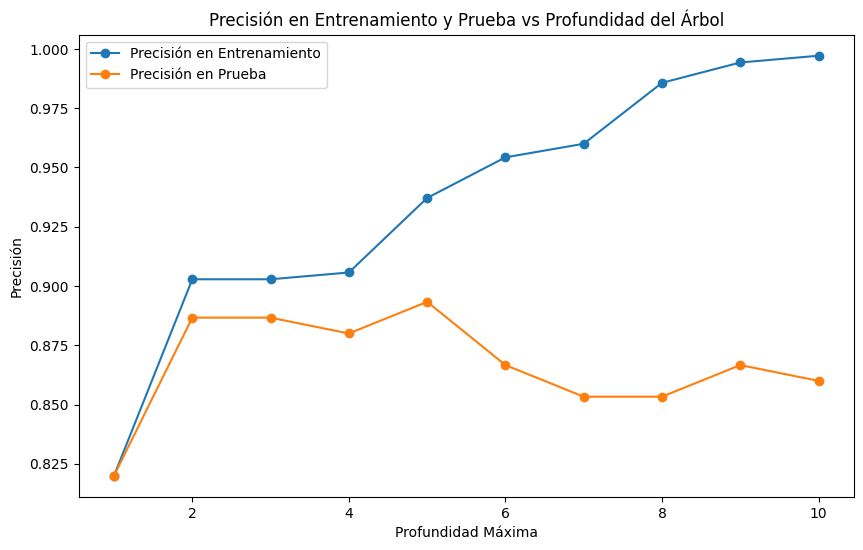

In [34]:
# Gráfica de precisión en entrenamiento y prueba vs profundidad
from sklearn.metrics import accuracy_score

def plot_accuracy_vs_depth():
    max_depths = range(1, 11)
    train_accuracies = []
    test_accuracies = []

    for depth in max_depths:
        clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)
        train_accuracies.append(accuracy_score(y_train, clf.predict(X_train)))
        test_accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

    # Graficar las precisiones
    plt.figure(figsize=(10, 6))
    plt.plot(max_depths, train_accuracies, label="Precisión en Entrenamiento", marker='o')
    plt.plot(max_depths, test_accuracies, label="Precisión en Prueba", marker='o')
    plt.xlabel("Profundidad Máxima")
    plt.ylabel("Precisión")
    plt.title("Precisión en Entrenamiento y Prueba vs Profundidad del Árbol")
    plt.legend()
    plt.show()

# Mostrar la gráfica de precisión vs profundidad
plot_accuracy_vs_depth()